In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Levenshtein

c:\Users\Willi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load the files
experiment_names, dfs, failed_dfs = [], [], []
for file_name in os.listdir():
    if 'analysis' not in file_name and 'failed' not in file_name:
        experiment_names.append(file_name[: -4])

for name in experiment_names:
    dfs.append(pd.read_csv(f'{name}.csv'))
    failed_dfs.append(pd.read_csv(f'{name}_failed.csv'))


In [3]:
# %Failed
for idx, name in enumerate(experiment_names):
    print(name)
    print(f'#Success: {len(dfs[idx])}, #Failed {len(failed_dfs[idx])}, {len(dfs[idx]) / (len(dfs[idx]) + len(failed_dfs[idx]))}')

20-d12_clare_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_0.2_gpt10.0_sbert0.9
#Success: 371, #Failed 0, 1.0
20-d12_clare_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_0.5_gpt10.0_sbert0.9
#Success: 371, #Failed 0, 1.0
20-d12_clare_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0_gpt10.0_sbert0.9
#Success: 371, #Failed 0, 1.0
20-d12_clare_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_2.0_gpt10.0_sbert0.9
#Success: 341, #Failed 0, 1.0
20-d12_faster_genetic_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_0.2_gpt10.0_sbert0.9
#Success: 341, #Failed 30, 0.9191374663072777
20-d12_faster_genetic_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_0.5_gpt10.0_sbert0.9
#Success: 338, #Failed 33, 0.9110512129380054
20-d12_faster_genetic_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0_gpt10.0_sbert0.9
#Success: 260, #Failed 41, 0.8637873754152824
20-d12_faster_genetic_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down

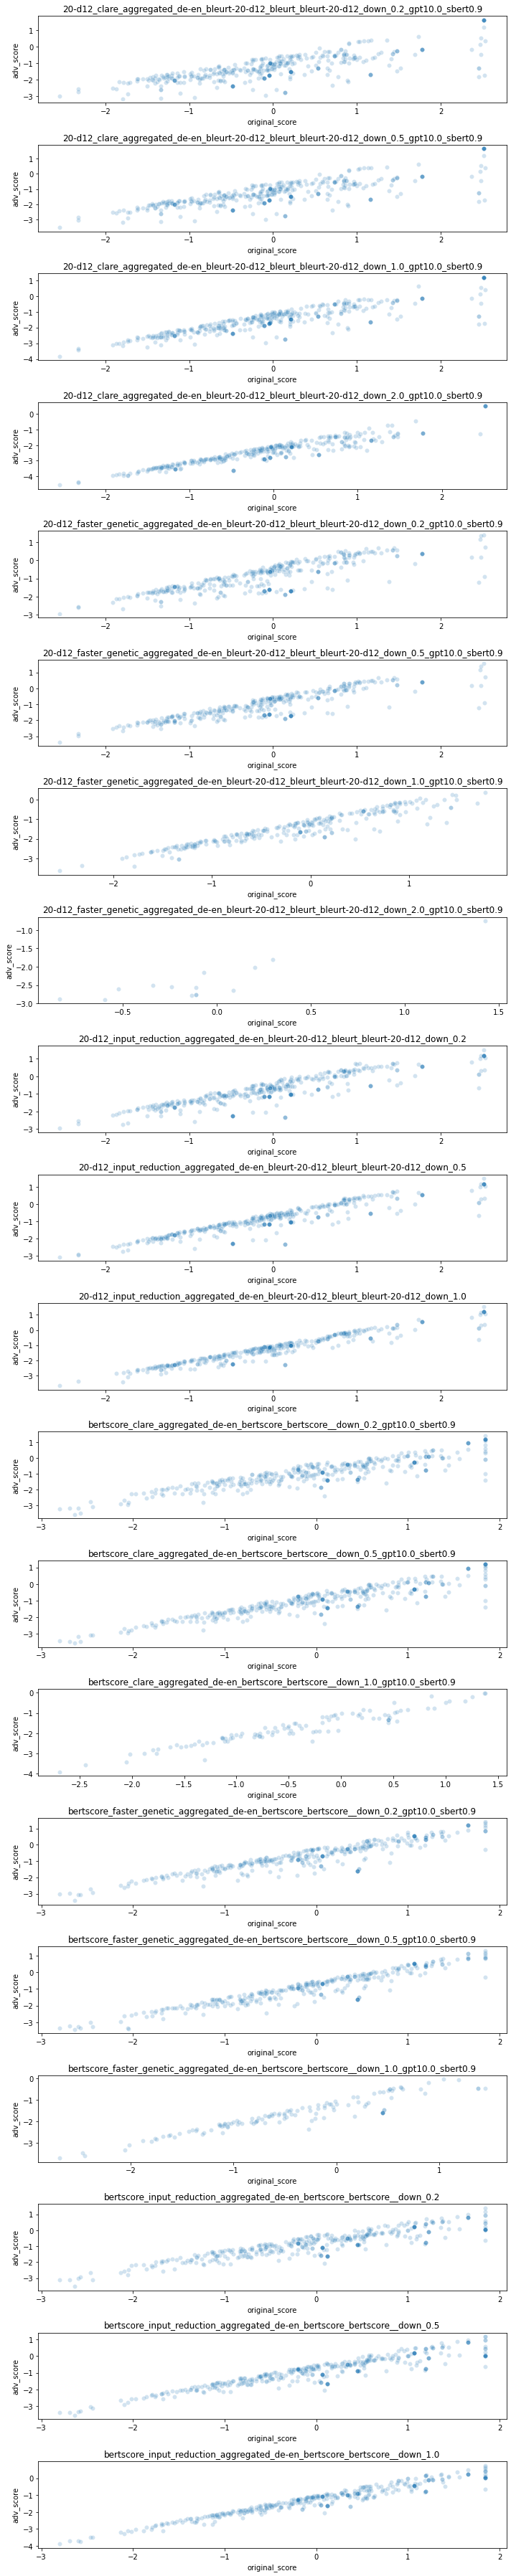

In [4]:
# Score distribution (before, after)
fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 50), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    sns.scatterplot(ax = axs[idx], x = dfs[idx]['original_score'], y = dfs[idx]['adv_score'], alpha = 0.2)

fig.tight_layout()
plt.show()

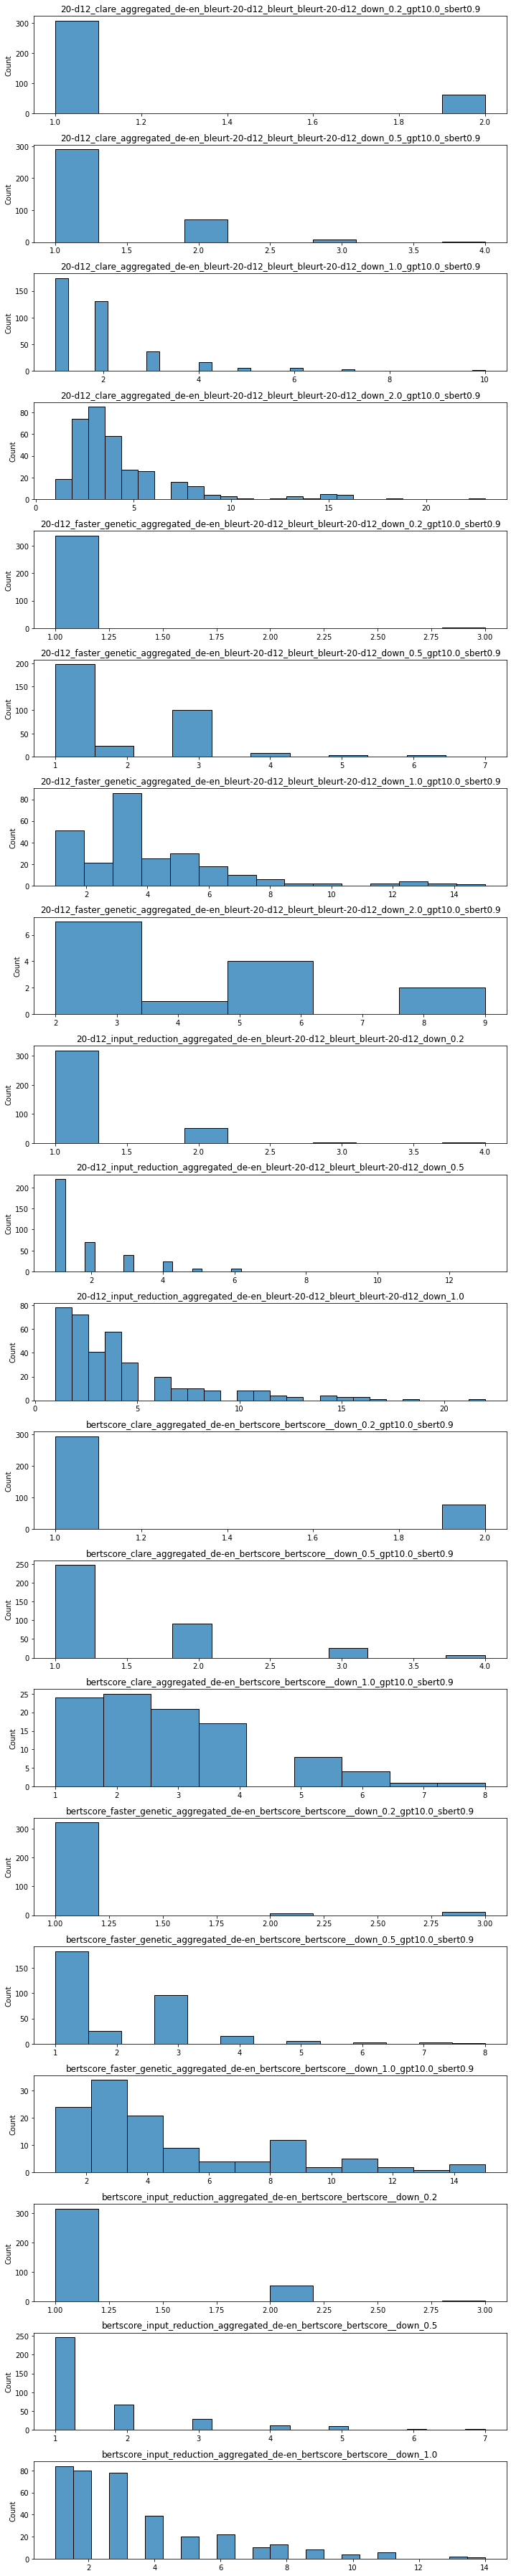

In [5]:
# Edit distance
def get_edit_dist(df):
    out = []
    for line_idx in range(len(df)):
        mt = df['mt'][line_idx]
        adv = df['adv'][line_idx]
        dist = Levenshtein.distance(mt.split(' '), adv.split(' '))
        out.append(dist)
    return out

fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 50), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    dist = get_edit_dist(dfs[idx])
    sns.histplot(dist, ax = axs[idx])

fig.tight_layout()
plt.show()